# Data Science Study Guide

## 1. Stochastic Gradient Descent (SGD)

- **Definition**: Stochastic Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning models, particularly for linear models like logistic regression and neural networks. It is a variant of gradient descent where the model parameters are updated for each training example, rather than calculating the gradient based on the entire dataset.
  
- **How it works**:
  1. Randomly shuffle the data.
  2. Take one sample from the training set, compute the gradient of the cost function with respect to the model parameters, and update the parameters using this gradient.
    1. A cost function (e.g. MSE), or $J(\theta)$ is defined:
    $$
    J(\theta) = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2
    $$

    where:
    * $\hat{y}^{(i)}$ is the model's prediction for the i-th example,
    * $y^{(i)}$ is the actual value for the i-th example,
    * $\textit{m}$ is the total number of examples,
    * $\theta$ represents the parameters of the model.

    2. The gradient is the vector of partial derivatives of the cost function with respect to each model parameter. For each parameter $\theta_j$, the partial derivative is:
    $$
    \frac{\partial J(\theta)}{\partial \theta_j}
    $$

    This derivative is computed to update $\theta_j$.

    Here's partial derivative with respect to $\theta_j$ :
    $$
    \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}(\hat{y}^{(i)}-y^{(i)})x_j^{(i)}
    $$

    where $x_j^{(i)}$ is the value of the $i$-th example.

    3. The gradient points in the direction of the steepest ascent of the cost function. To minimize the cost function, we take steps in the opposite direction of the gradient. This leads to a parameter update rule in gradient descent:

    $$
    \theta_j := \theta_j - \alpha\frac{\partial J(\theta)}{\partial \theta_j}
    $$

    where $\alpha$ is the learning rate that controls the step size.

  3. Repeat this for all samples and iterate until convergence.

- **Advantages**:
  - Faster convergence for large datasets.
  - Reduces memory usage since updates are done incrementally.

- **Disadvantages**:
  - Can be noisy, as it updates based on individual data points rather than the full batch.
  - May converge to suboptimal solutions due to noise.

---

## 2. Multicollinearity

- **Definition**: Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, meaning one can be linearly predicted from the others.

- **Why it matters**:
  - It can lead to inflated standard errors of the coefficients, making it hard to assess the impact of individual predictors.
  - Coefficient estimates become unstable and highly sensitive to changes in the model.

- **Detection Methods**:
  1. **Variance Inflation Factor (VIF)**: Measures how much the variance of a regression coefficient is inflated due to multicollinearity.
  2. **Correlation Matrix**: Check for high correlation values between independent variables.

- **Solutions**:
  - Remove highly correlated predictors.
  - Use dimensionality reduction techniques like Principal Component Analysis (PCA).
  - Use regularization methods like Ridge or Lasso Regression.

---


# Detecting Multicollinearity with a Correlation Heat Map

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [10]:
url = 'https://raw.githubusercontent.com/theriny/datascience_toolbox/refs/heads/main/nba_data.csv'


# Load the CSV file into a Dataframe
df = pd.read_csv(url,index_col=False)

df.head()

,outcome,sumfg,sumfg3,sumft,sumorb,sumast,sumpts,sumdrb,sumstl,sumblk,Offensive Effort,Defensive Effort
0,1,69,20,31,17,44,189,61,11,7,1,1
1,0,67,23,29,17,39,186,60,8,12,0,0
2,0,43,19,17,16,30,122,37,4,9,0,0
3,1,76,25,48,29,40,225,75,11,6,1,1
4,0,64,20,16,10,25,164,49,13,10,1,1


In [11]:
# Normalize quantitative fields using Min-Max scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

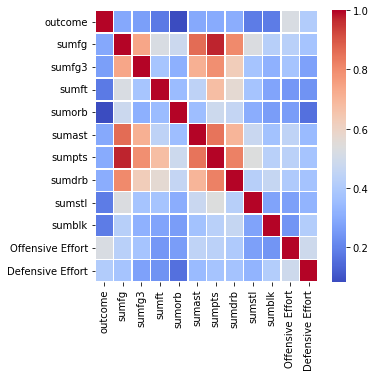

In [12]:
# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()

plt.figure(figsize=(5,5))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)



# Show the plot
plt.show()

The stats with high correlation have warmer values on the heat map.



## 3. Common Machine Learning Algorithms

### 1. Linear Regression
- **Type**: Supervised learning (regression)
- **Use case**: Predicting a continuous value (e.g., predicting house prices).
- **Key idea**: Models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.

### 2. Logistic Regression
- **Type**: Supervised learning (classification)
- **Use case**: Predicting binary outcomes (e.g., spam detection, disease presence).
- **Key idea**: Uses the logistic function to model binary outcomes, where the output is transformed into probabilities.

### 3. Decision Trees
- **Type**: Supervised learning (classification and regression)
- **Use case**: Modeling decisions with hierarchical structure (e.g., customer segmentation).
- **Key idea**: Splits data into subsets based on feature values, leading to a tree-like structure of decisions.

### 4. Random Forest
- **Type**: Supervised learning (classification and regression)
- **Use case**: Robust predictions with high accuracy (e.g., fraud detection, image classification).
- **Key idea**: An ensemble of decision trees, where multiple trees are built and their predictions averaged (regression) or taken by majority vote (classification).

### 5. Support Vector Machines (SVM)
- **Type**: Supervised learning (classification)
- **Use case**: High-dimensional classification problems (e.g., text categorization).
- **Key idea**: Finds the hyperplane that best separates the classes in the feature space.

### 6. K-Nearest Neighbors (KNN)
- **Type**: Supervised learning (classification and regression)
- **Use case**: Simple, instance-based learning (e.g., recommendation systems).
- **Key idea**: Classifies a new data point based on the majority label of its k-nearest neighbors.

### 7. K-Means Clustering
- **Type**: Unsupervised learning (clustering)
- **Use case**: Grouping data into clusters (e.g., market segmentation).
- **Key idea**: Partitions data into k clusters, where each data point belongs to the cluster with the nearest mean.

### 8. Gradient Boosting Machines (GBM)
- **Type**: Supervised learning (classification and regression)
- **Use case**: Predictive accuracy in structured data (e.g., financial forecasting).
- **Key idea**: Builds an ensemble of weak models (e.g., decision trees) in a sequential manner, where each model corrects the errors of its predecessor.

---

## 4. Regularization

- **Definition**: Regularization is a technique to reduce model overfitting by adding a penalty term to the loss function.

- **Types**:
  - **Ridge Regression (L2 Regularization)**: Adds a penalty equal to the square of the magnitude of coefficients, shrinking less important features but keeping all in the model.
  - **Lasso Regression (L1 Regularization)**: Adds a penalty equal to the absolute value of the magnitude of coefficients, leading to some coefficients becoming exactly zero (automatic feature selection).

- **Why it matters**: Regularization prevents overfitting by discouraging overly complex models that fit the training data too closely but generalize poorly to new data.

---

## 5. Bias-Variance Tradeoff

- **Bias**: Error due to overly simplistic assumptions in the model. High bias can lead to underfitting (the model is too simple to capture the underlying patterns).

- **Variance**: Error due to the model being too sensitive to small fluctuations in the training data. High variance can lead to overfitting (the model is too complex and captures noise as well as the underlying patterns).

- **Tradeoff**: The goal is to balance bias and variance to minimize the total prediction error.

---

## 6. Cross-Validation

- **Definition**: Cross-validation is a technique used to evaluate the generalization ability of a model by splitting the data into multiple subsets (folds) and training the model on some folds while testing on others.

- **Types**:
  - **K-Fold Cross-Validation**: Divides the dataset into k equally sized folds, trains the model on k-1 folds, and tests on the remaining fold. This is repeated k times, with each fold used exactly once as the test set.
  - **Leave-One-Out Cross-Validation (LOOCV)**: Special case of k-fold cross-validation where k is equal to the number of data points in the dataset.

- **Why it matters**: Cross-validation helps to assess how well a model will generalize to new, unseen data.

---

## 7. Dimensionality Reduction

- **Definition**: Techniques used to reduce the number of input variables in a dataset by transforming the data into a lower-dimensional space.

- **Key Methods**:
  - **Principal Component Analysis (PCA)**: Projects the data onto directions (principal components) that maximize variance.
  - **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: A nonlinear technique for dimensionality reduction used mainly for visualization of high-dimensional datasets.

- **Why it matters**: Reducing the number of dimensions can improve model performance by removing noise, speeding up computations, and avoiding the curse of dimensionality.

---

## 8. Hyperparameter Tuning

- **Definition**: Hyperparameters are parameters that are set before the learning process begins and control the behavior of the model. Tuning refers to the process of finding the best set of hyperparameters for optimal model performance.

- **Methods**:
  - **Grid Search**: Exhaustively tests all combinations of hyperparameter values from a specified set.
  - **Random Search**: Randomly samples hyperparameter values within a specified range, which can be more efficient for high-dimensional spaces.
  - **Bayesian Optimization**: Uses probabilistic models to predict good sets of hyperparameters.



## 9. Model Performance Evaluation

When building machine learning models, it's important to evaluate their performance using appropriate metrics. The choice of metric depends on the type of problem (classification, regression, etc.) and the goals of the analysis.

### 1. Confusion Matrix
- **Definition**: A confusion matrix is a table used to evaluate the performance of a classification model by comparing actual vs. predicted values. It consists of four components:
  - **True Positives (TP)**: Correctly predicted positive instances.
  - **True Negatives (TN)**: Correctly predicted negative instances.
  - **False Positives (FP)**: Incorrectly predicted positive instances (Type I error).
  - **False Negatives (FN)**: Incorrectly predicted negative instances (Type II error).
  
- **Example**: A confusion matrix for a binary classification model might look like this:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| Actual Positive | TP                 | FN                 |
| Actual Negative | FP                 | TN                 |

### 2. Precision
- **Definition**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: *Of all instances classified as positive, how many were actually positive?*
  
- **Formula**:
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$
  
- **Interpretation**: High precision means the model makes fewer false positive predictions. It is important when the cost of false positives is high, such as in medical diagnostics.

### 3. Recall (Sensitivity or True Positive Rate)
- **Definition**: Recall is the ratio of correctly predicted positive observations to all actual positives. It answers the question: *Of all actual positive instances, how many were correctly predicted?*
  
- **Formula**:
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$
  
- **Interpretation**: High recall indicates that the model captures most of the positive instances, but it might have more false positives. Recall is critical in scenarios where missing a positive case is more costly, such as in disease detection.

### 4. F1-Score
- **Definition**: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances the trade-off between precision and recall.
  
- **Formula**:
  $$
  \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$
  
- **Interpretation**: The F1-score is useful when we need a balance between precision and recall, especially in cases where the class distribution is imbalanced.

### 5. Accuracy
- **Definition**: Accuracy is the ratio of correctly predicted observations to the total observations.
  
- **Formula**:
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$
  
- **Interpretation**: Accuracy is a good metric when the classes are balanced, but it can be misleading when the data is imbalanced. For instance, if 95% of instances are negative, a model that predicts everything as negative will have high accuracy but poor precision and recall.

### 6. AUC-ROC (Area Under the Receiver Operating Characteristic Curve)
- **Definition**: The ROC curve is a plot of the true positive rate (recall) against the false positive rate (1 - specificity). The area under the curve (AUC) provides a single metric that represents the overall performance of the model.

- **Interpretation**: AUC-ROC values range from 0.5 (random guessing) to 1.0 (perfect classifier). It is useful for evaluating models on imbalanced datasets because it takes both positive and negative classes into account.

### 7. Mean Squared Error (MSE)
- **Definition**: MSE is used to evaluate regression models. It is the average of the squared differences between actual and predicted values.

- **Formula**:
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
  
- **Interpretation**: A lower MSE indicates a better model fit. However, since it squares the errors, larger errors are penalized more heavily.

### 8. R-squared (R²)
- **Definition**: R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model.

- **Formula**:
  $$
  R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
  $$
  
- **Interpretation**: R² values range from 0 to 1. A higher R² value indicates a better fit of the model to the data. An R² of 0 means the model does not explain any of the variance, while an R² of 1 means the model explains all the variance.

